In [11]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from geopy.distance import great_circle
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv('Data/BlackSky_Albedo_100_Points_Per_Specific_Date_Trondheim.csv')

In [20]:
# Convert lat/lon to a NumPy array
coords = df[['Latitude', 'Longitude']].to_numpy()

# Haversine distance metric is used for geospatial clustering
kms_per_radian = 6371.0088  # Earth's radius in kilometers
epsilon = 1 / kms_per_radian  # Epsilon is in radians (1 km)

# DBSCAN clustering
db = DBSCAN(eps=epsilon, min_samples=2, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
df['cluster'] = db.labels_

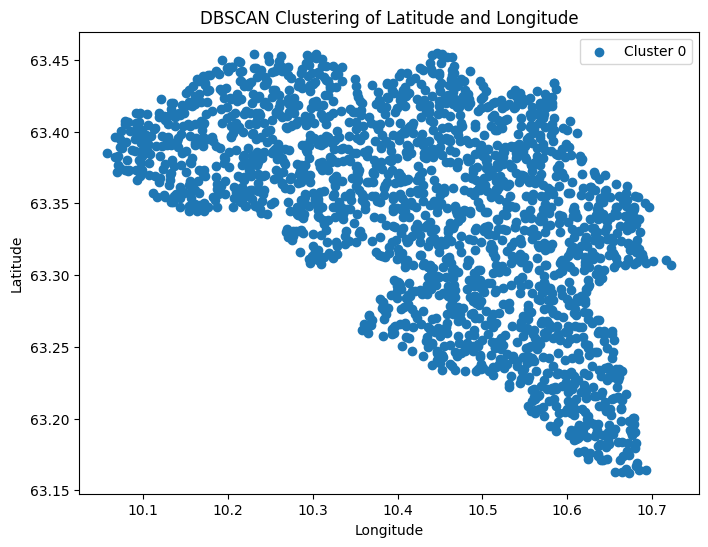

In [21]:
# Visualize the results
plt.figure(figsize=(8, 6))
for cluster in set(df['cluster']):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}')
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN Clustering of Latitude and Longitude")
plt.show()


In [13]:
df.head()

,Date,Latitude,Longitude,BlackSky_Albedo,cluster
0,2023-04-20,63.339410,10.334985,0.337787,14
1,2023-04-20,63.412006,10.563888,0.212405,7
2,2023-04-20,63.335705,10.313261,0.363394,14
3,2023-04-20,63.364925,10.366179,0.188948,0
4,2023-04-20,63.271865,10.610466,0.160666,3


In [26]:
# Apply K-Means Clustering
n_clusters = 400
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(coords)

# Add cluster labels to the dataframe
df['cluster'] = kmeans.labels_

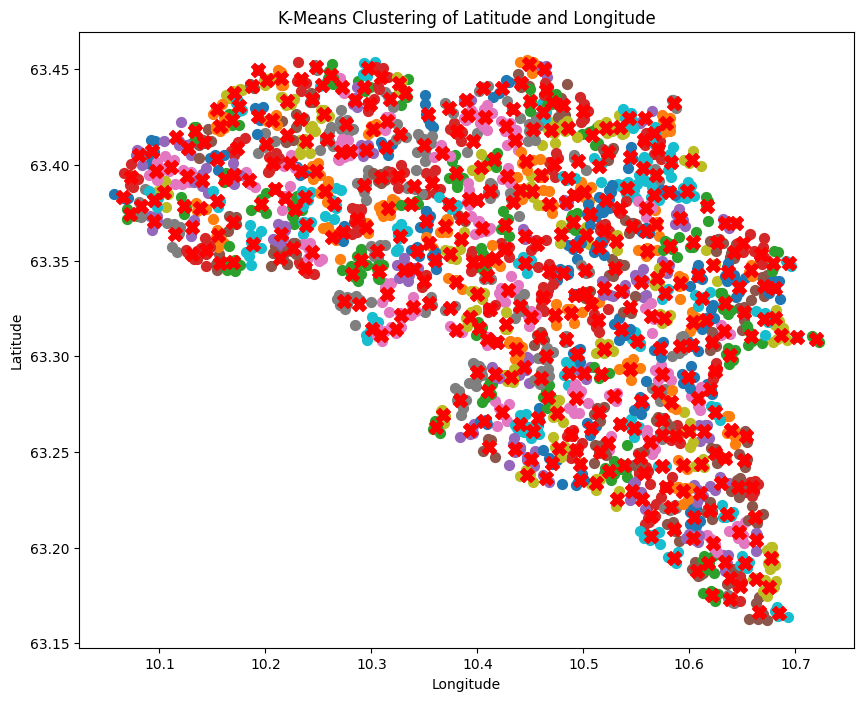

In [28]:
# Plot the clusters
plt.figure(figsize=(10, 8))
for i in range(n_clusters):
    cluster_points = coords[df['cluster'] == i]
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], label=f'Cluster {i}', s=50)  # Longitude (x-axis), Latitude (y-axis)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', marker='X', s=100, label='Centroids')

plt.title("K-Means Clustering of Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.legend()
plt.show()

In [41]:
df.groupby('cluster')['cluster'].size().describe()

count    400.00000
mean       5.00000
std        1.91289
min        1.00000
25%        4.00000
50%        5.00000
75%        6.00000
max       13.00000
Name: cluster, dtype: float64

In [40]:
df.describe()

,Latitude,Longitude,BlackSky_Albedo,cluster
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,63.341337,10.431620,0.347759,188.422000
std,0.068419,0.161615,0.245930,111.270263
min,63.162303,10.057259,0.134332,0.000000
25%,63.293292,10.305966,0.225784,91.750000
50%,63.353988,10.456283,0.269874,185.000000
75%,63.394770,10.566223,0.341441,281.000000
max,63.454929,10.722003,1.837165,399.000000
